In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import Data and Pre-Processing

In [2]:
df = pd.read_csv('restaurant.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [4]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [5]:
df=df[['stars', 'text']]
df.head()

,stars,text
0,5,After getting food poisoning at the Palms hote...
1,4,"""A feast worthy of Gods""\n\nBaccarnal Buffet i..."
2,4,The crab legs are better than the ones at Wick...
3,1,Not worth it! Too salty food and expensive! Th...
4,5,I would give this infinite stars if I could. M...


In [6]:
df['text']=df['text'].str.lower().str.replace('[^\w\s]','').str.replace('\d+','').str.replace('\n',' ').replace('\r','')
# kucultme, noktalama silme, sayilari silme, new line silme, enter silme

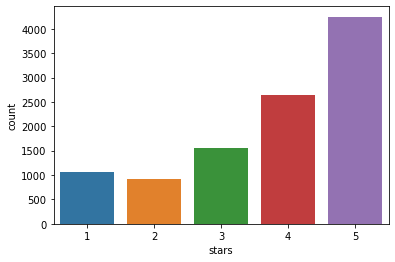

In [7]:
sns.countplot(df.stars);

In [8]:
df.loc[df.stars>=1, 'sentiment'] = 'negative'
df.loc[df.stars>=3, 'sentiment'] = 'neutral'
df.loc[df.stars>=4, 'sentiment'] = 'positive'
df.head(5)

,stars,text,sentiment
0,5,after getting food poisoning at the palms hote...,positive
1,4,a feast worthy of gods baccarnal buffet in ca...,positive
2,4,the crab legs are better than the ones at wick...,positive
3,1,not worth it too salty food and expensive this...,negative
4,5,i would give this infinite stars if i could my...,positive


In [9]:
from langdetect import detect
df['language']=df.text.apply(detect)
df.head(5)

,stars,text,sentiment,language
0,5,after getting food poisoning at the palms hote...,positive,en
1,4,a feast worthy of gods baccarnal buffet in ca...,positive,en
2,4,the crab legs are better than the ones at wick...,positive,en
3,1,not worth it too salty food and expensive this...,negative,en
4,5,i would give this infinite stars if i could my...,positive,en


In [10]:
from textblob import TextBlob
text = df[df.language !='en'].text.values[0]
print(text)
str(TextBlob(text).translate(from_lang=detect(text), to='en'))

真心不怎么样 中午没有雪蟹腿 菜都很一般 港式点心说的过去其他的中式菜只能说尚且入口 寿司品质还行 并没有一些中式buffet好其实 两小时的限制也让人不愉快 前台不友好 这里真心没有爱 和很糟糕 没礼貌的服务


"It's really not very good at noon, no snow crab leg dishes are very common in Hong Kong -style snacks. In the past, other Chinese dishes can only be said to say that the quality of the entrance sushi is okay. There are not some Chinese buffets. There is no love and bad service here."

In [11]:
# yabanci dilleri Ingilizce ye cevirdik
#df[df.language !='en'].text.apply(lambda x: str(TextBlob(x).translate(from_lang=detect(x), to='en')))
# calisiyor ama bazi cumleleri cevirmiyor bu yuzden kullanmadim

In [12]:
df=df[df.language=='en'] # sadece ing cumleleri aldik

In [13]:
df[['polarity', 'subjectivity']]=df.text.apply(lambda x: pd.Series(TextBlob(x).sentiment))
df.head()

,stars,text,sentiment,language,polarity,subjectivity
0,5,after getting food poisoning at the palms hote...,positive,en,0.367452,0.605702
1,4,a feast worthy of gods baccarnal buffet in ca...,positive,en,0.219409,0.537292
2,4,the crab legs are better than the ones at wick...,positive,en,-0.134722,0.731944
3,1,not worth it too salty food and expensive this...,negative,en,-0.325000,0.400000
4,5,i would give this infinite stars if i could my...,positive,en,0.362500,0.725000


In [14]:
df.sentiment.value_counts()

positive    6852
negative    1964
neutral     1557
Name: sentiment, dtype: int64

## WordCloud

In [15]:
from wordcloud import WordCloud,STOPWORDS

import os
from PIL import Image

In [16]:
def create_wordcloud(text, sent):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=25000,
                  stopwords=stopwords,
                  min_word_length=3)
    wc.generate(str(text))
    wc.to_file(sent+".png")
    print("Word Cloud Saved Successfully")
    path=sent+".png"
    display(Image.open(path))

Word Cloud Saved Successfully


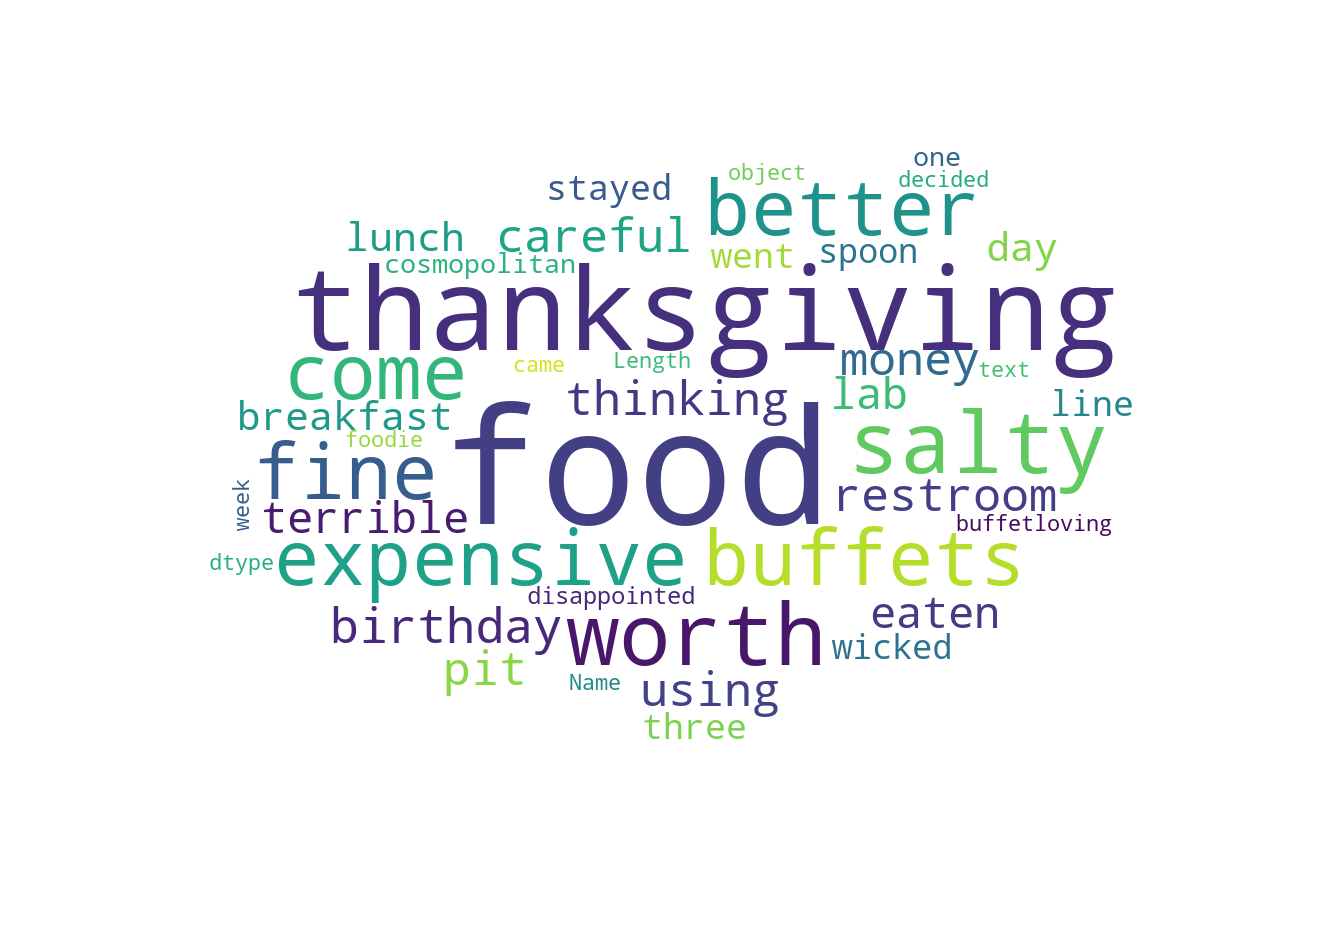

In [17]:
# Negatif Yorumlar
sent = 'negative'
create_wordcloud(df[df.sentiment==sent].text, sent)

Word Cloud Saved Successfully


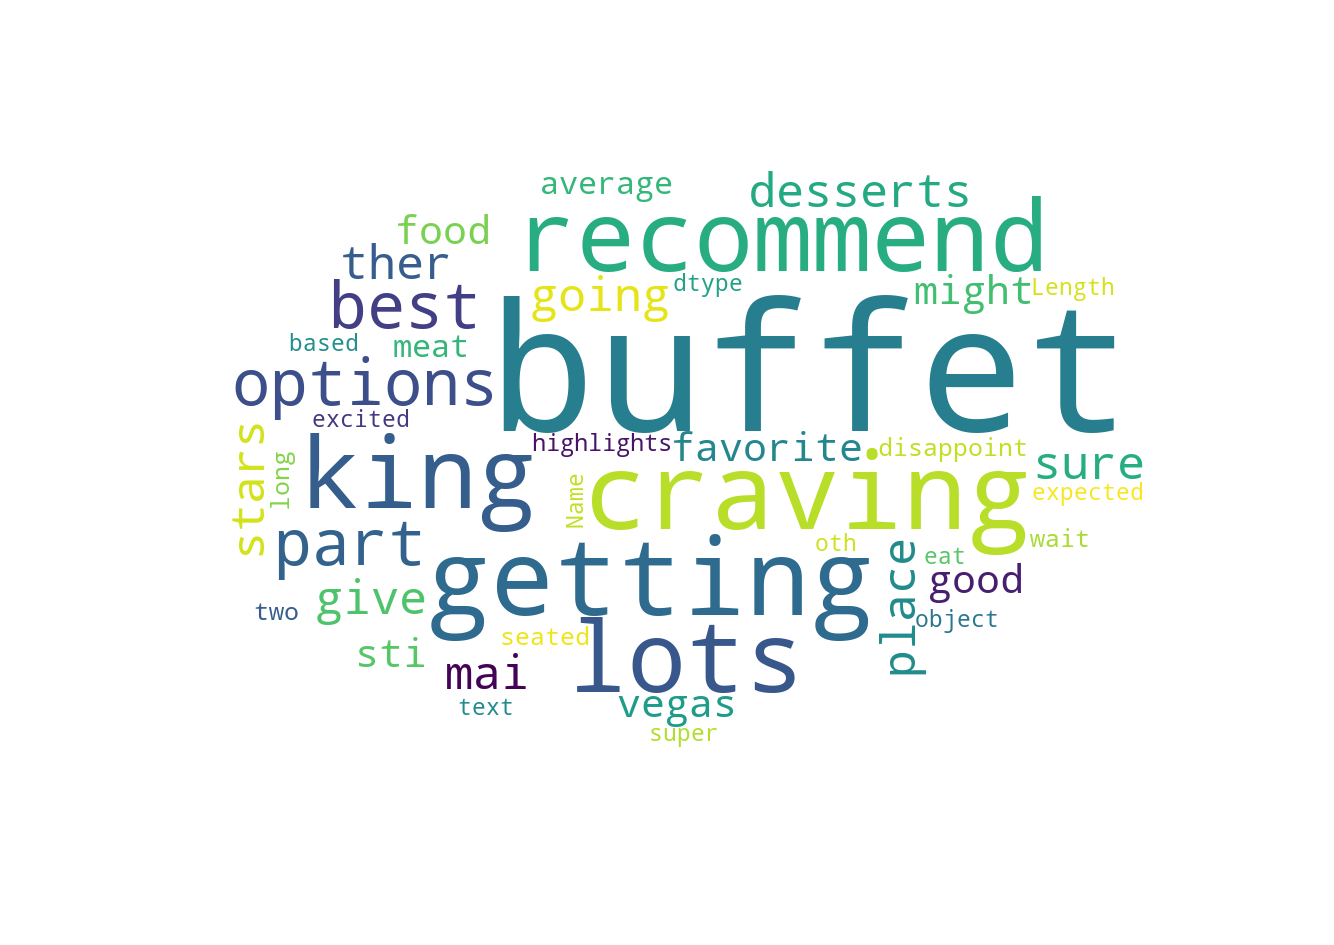

In [18]:
# Notr Yorumlar
sent = 'neutral'
create_wordcloud(df[df.sentiment==sent].text, sent)

Word Cloud Saved Successfully


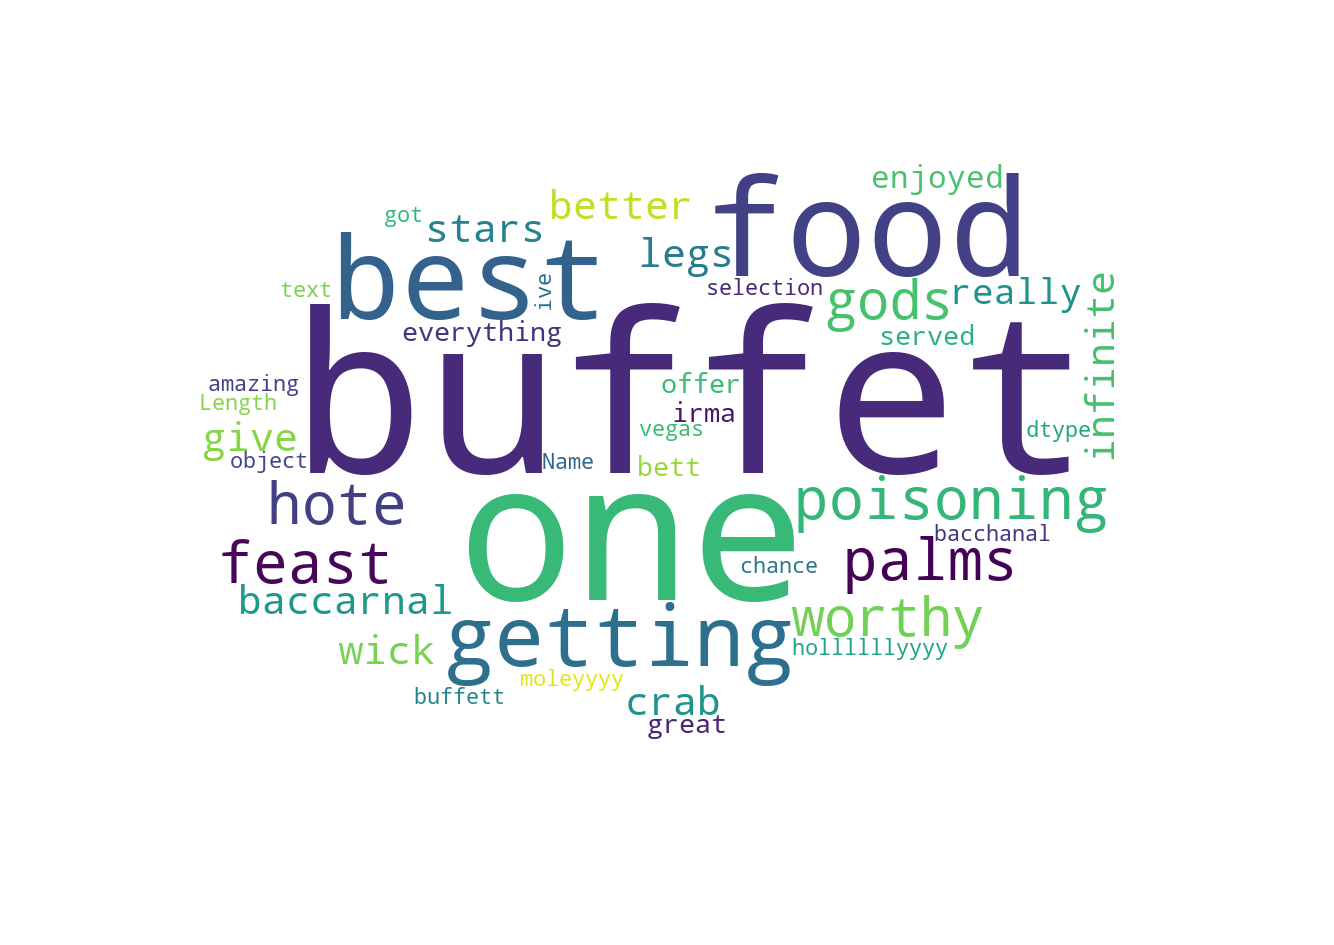

In [19]:
# Pozitif Yorumlar
sent = 'positive'
create_wordcloud(df[df.sentiment==sent].text, sent)

## Prepare the Data for Classification

In [20]:
X=df.text
y=df.sentiment

### CountVectorizer without N-gram
* **max_df = 0.50** means "ignore terms that appear in more than 50% of the documents".
* **max_df = 25** means "ignore terms that appear in more than 25 documents".
* **min_df = 0.01** means "ignore terms that appear in less than 1% of the documents".
* **min_df = 5** means "ignore terms that appear in less than 5 documents".
* **binary = True** , the CountVectorizer no more takes into consideration the frequency of the term/word. If it occurs it’s set to 1 otherwise 0.

**OPTIONS:**
* **CountVectorizer** or **TfidfVectorizer**
* **ngram_range on** or **ngram_range off**

In [21]:
#Machine learning
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [22]:
def nlp_analysis(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
    
    vectorizers=[CountVectorizer(), TfidfVectorizer()]
    ngrams = [(1,1), (1,2)]
    
    classifiers=[LogisticRegression(), KNeighborsClassifier(3), DecisionTreeClassifier(), RandomForestClassifier(),
    AdaBoostClassifier(), GradientBoostingClassifier(), MultinomialNB(), BernoulliNB()]
    
    col_names = ['Classifier','Methods', 'N-Grams','Accuracy','Precision','Recall', 'F1']
    df_nlp = pd.DataFrame(columns=col_names)   
    
    #accuracy = [] 
    #precision = [] 
    #recall = [] 
    #f1 =[] 
    
    for i in vectorizers:
        vec=i
        vec_name = i.__class__.__name__
        vec.stop_words='english'
        
        for j in ngrams:
            vec.ngram_range=j
            X_train_dtm = vec.fit_transform(X_train)
            X_test_dtm = vec.transform(X_test)
            
            for k in classifiers:
                pred = k.fit(X_train_dtm, y_train).predict(X_test_dtm)
                clas_name = k.__class__.__name__
                
                accuracy = accuracy_score(y_test, pred)
                precision = precision_score(y_test, pred, average='weighted')
                f1 = f1_score(y_test, pred, average='weighted')
                recall = recall_score(y_test, pred, average='weighted')
                
                df_entry = pd.DataFrame([[clas_name, vec_name, j, accuracy*100, precision*100, recall*100, f1*100]], 
                                        columns=col_names)
                df_nlp=df_nlp.append(df_entry)
    #pd.DataFrame([[clas_name, vec_name, j, accuracy*100, precision*100, recall*100, f1*100]], columns=col_names)
    #df_nlp['Accuracy'] = accuracy 
    #df_nlp['Precision'] = precision 
    #df_nlp['Recall'] = recall 
    #df_nlp["F1"] = f1 
    # boyle yaparsn faha hizli olabilir belki
    return df_nlp

In [23]:
# 7 dakika surdu

In [24]:
df = nlp_analysis(X,y)

In [25]:
df.sort_values(by='Accuracy', ascending=False)

,Classifier,Methods,N-Grams,Accuracy,Precision,Recall,F1
0,LogisticRegression,CountVectorizer,"(1, 2)",81.493976,79.520847,81.493976,80.032634
0,LogisticRegression,TfidfVectorizer,"(1, 1)",80.626506,77.889139,80.626506,77.958609
0,LogisticRegression,CountVectorizer,"(1, 1)",78.795181,77.688779,78.795181,78.137801
0,LogisticRegression,TfidfVectorizer,"(1, 2)",78.698795,75.514559,78.698795,74.713757
0,MultinomialNB,CountVectorizer,"(1, 1)",78.457831,74.931592,78.457831,75.14198
0,GradientBoostingClassifier,TfidfVectorizer,"(1, 2)",77.590361,75.559987,77.590361,74.265514
0,AdaBoostClassifier,TfidfVectorizer,"(1, 2)",76.86747,73.521479,76.86747,74.13634
0,GradientBoostingClassifier,TfidfVectorizer,"(1, 1)",76.86747,74.824854,76.86747,72.951194
0,GradientBoostingClassifier,CountVectorizer,"(1, 1)",76.578313,74.579502,76.578313,72.618367
0,AdaBoostClassifier,TfidfVectorizer,"(1, 1)",76.578313,73.11666,76.578313,73.607777


### Best Solution

<AxesSubplot:>

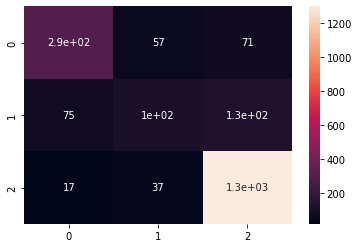

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
vec=CountVectorizer(stop_words='english', ngram_range=(1,2))
X_train_dtm=vec.fit_transform(X_train)
X_test_dtm=vec.transform(X_test)

lr=LogisticRegression()
pred=lr.fit(X_train_dtm, y_train).predict(X_test_dtm)
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

In [39]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.76      0.69      0.72       416
     neutral       0.53      0.34      0.41       306
    positive       0.87      0.96      0.91      1353

    accuracy                           0.81      2075
   macro avg       0.72      0.66      0.68      2075
weighted avg       0.80      0.81      0.80      2075



In [40]:
accuracy_score(y_test, pred)

0.8149397590361446